In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('50_Startups.csv')
print(data)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
list(data.columns)

['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']

In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data.size

250

In [7]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [15]:
data.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [16]:
data.replace({"State":{'New York':0,'Florida':1,'California':2}}, inplace=True)

In [17]:
print(data.corr())

                 R&D Spend  Administration  Marketing Spend     State  \
R&D Spend         1.000000        0.241955         0.724248 -0.104685   
Administration    0.241955        1.000000        -0.032154 -0.011847   
Marketing Spend   0.724248       -0.032154         1.000000 -0.077670   
State            -0.104685       -0.011847        -0.077670  1.000000   
Profit            0.972900        0.200717         0.747766 -0.101796   

                   Profit  
R&D Spend        0.972900  
Administration   0.200717  
Marketing Spend  0.747766  
State           -0.101796  
Profit           1.000000  


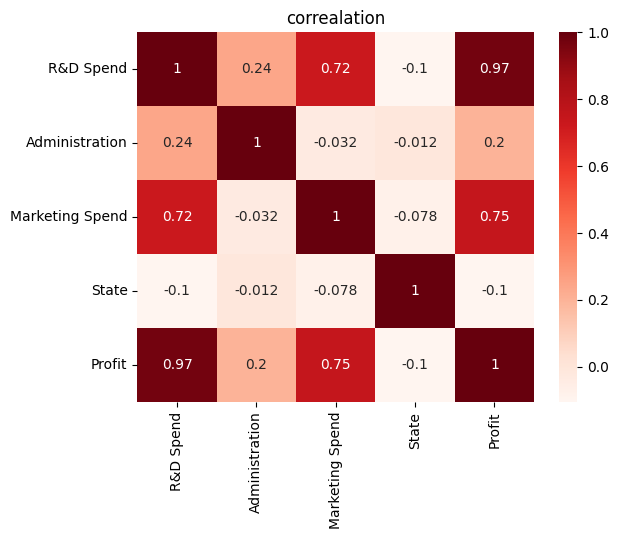

In [18]:
c=data.corr()
sns.heatmap(c,annot=True,cmap="Reds")
plt.title("correalation")
plt.show()

In [20]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [21]:
x

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,0
1,162597.70,151377.59,443898.53,2
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,0
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,0
6,134615.46,147198.87,127716.82,2
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,0
9,123334.88,108679.17,304981.62,2


In [22]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [26]:
model=LinearRegression()#calling linearRegression algorithm
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
r2= metrics.r2_score(y_test,y_pred)
print("r2 score value of the model is",r2)

r2 score value of the model is 0.9190953762348169


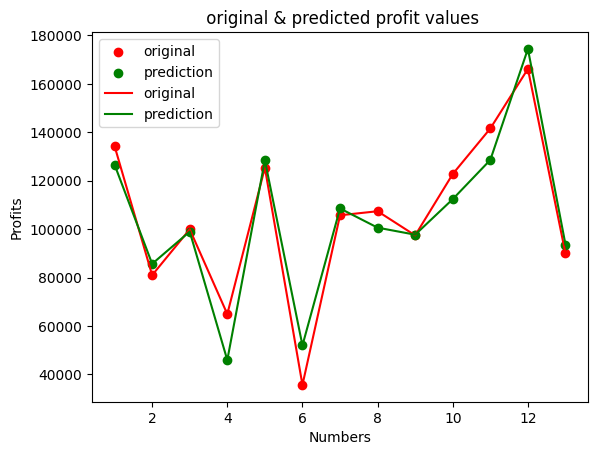

In [27]:
x_axis=[i for i in range(1,len(y_pred)+1)] #graph for test data.
plt.scatter(x_axis,y_test,c="red",label="original")
plt.scatter(x_axis,y_pred,c="green",label="prediction")
plt.plot(x_axis,y_test,c="red",label="original")
plt.plot(x_axis,y_pred,c="green",label="prediction")
plt.title(" original & predicted profit values")
plt.xlabel("Numbers")
plt.ylabel("Profits")
plt.legend()
plt.show() #test values of original and predicted

In [28]:
#score automates the prediction of your data using X_test and compares it with Y_test and
#by default uses the R-squared metric to so

print(f"Training score is{model.score(x_train,y_train)}")
print(f"Testing score is{model.score(x_test,y_test)}")

Training score is0.9544070449918145
Testing score is0.9190953762348169


In [30]:
#ADJUSTED R2 SCORE
data_size=data.size
print(data_size)
num_columns = data.shape[1]
num_columns

250


5

In [31]:
adj_r2 = 1 - ((1 - r2) * (data_size - 1)) / (data_size -num_columns  - 1)
print("the adjusted r2 value is",adj_r2)

the adjusted r2 value is 0.9174374946002845


In [32]:
pred=model.predict([[165349.2,136897.8,471784.1,0]]) #165349.2,136897.8,471784.1,New York,192261.83
print(pred)

[[192231.41568122]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
